In [1]:
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split


iris = datasets.load_iris() #Irisデータを読み込む
data, target = iris.data, iris.target #データとラベルを分ける
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0) # 学習データとテストデータへ7:3で分割

print(x_train.dtype, x_test.dtype, y_train.dtype, y_test.dtype) #データ型の確認
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape) #データ数の確認

float64 float64 int64 int64
(105, 4) (45, 4) (105,) (45,)


In [2]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier() #分類問題のモデルを作成
tree.fit(x_train, y_train) # 学習
y_pred = tree.predict(x_test) # テストデータの予測値

print(tree.get_params())
print(y_pred)
print('学習時スコア：', tree.score(x_train, y_train), '検証スコア', tree.score(x_test, y_test))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
学習時スコア： 1.0 検証スコア 0.9777777777777777


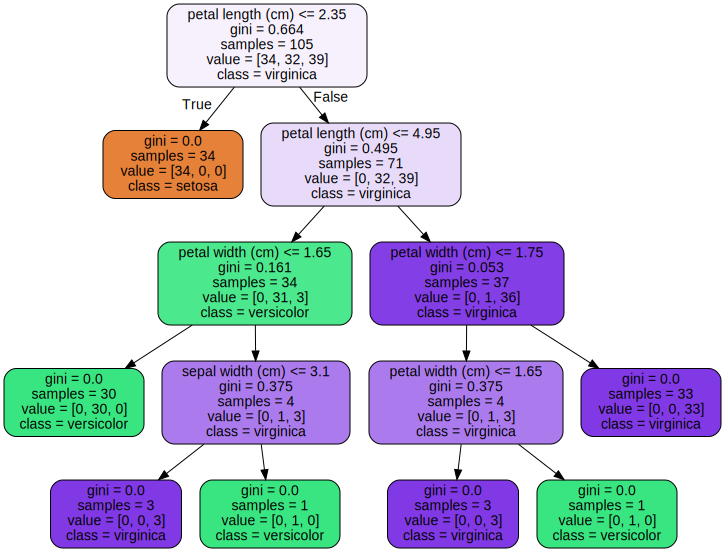

In [3]:
import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(tree, filled=True, rounded=True, 
                      class_names=['setosa', 'versicolor', 'virginica'],
                      feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                      out_file=None) 

graph = graphviz.Source(dot) #DOT記法をレンダリング
graph #グラフを出力

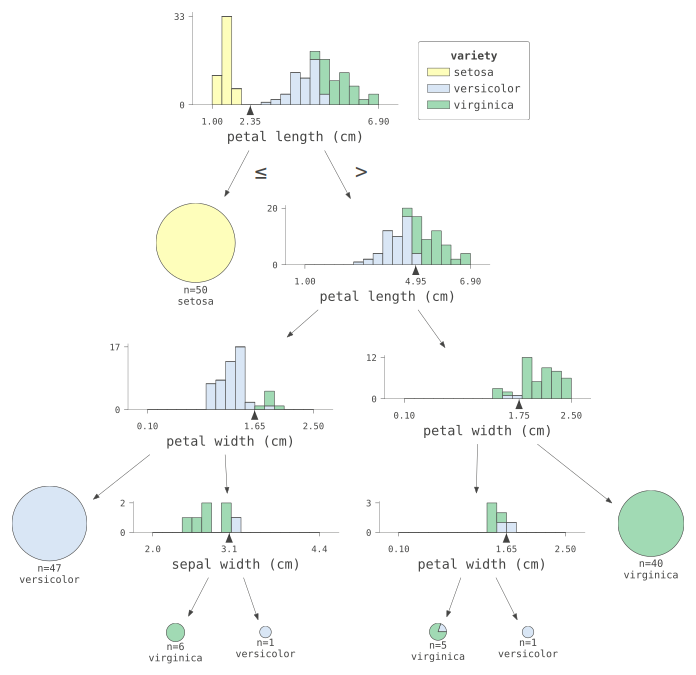

In [6]:
import dtreeviz
viz_model = dtreeviz.model(tree,
                           X_train=iris.data, y_train=iris.target,
                           feature_names=iris.feature_names,
                           class_names=[str(i) for i in iris.target_names],
                           target_name='variety')
v = viz_model.view(scale=1.5,fontname="monospace")
v.save("test2.svg")
v

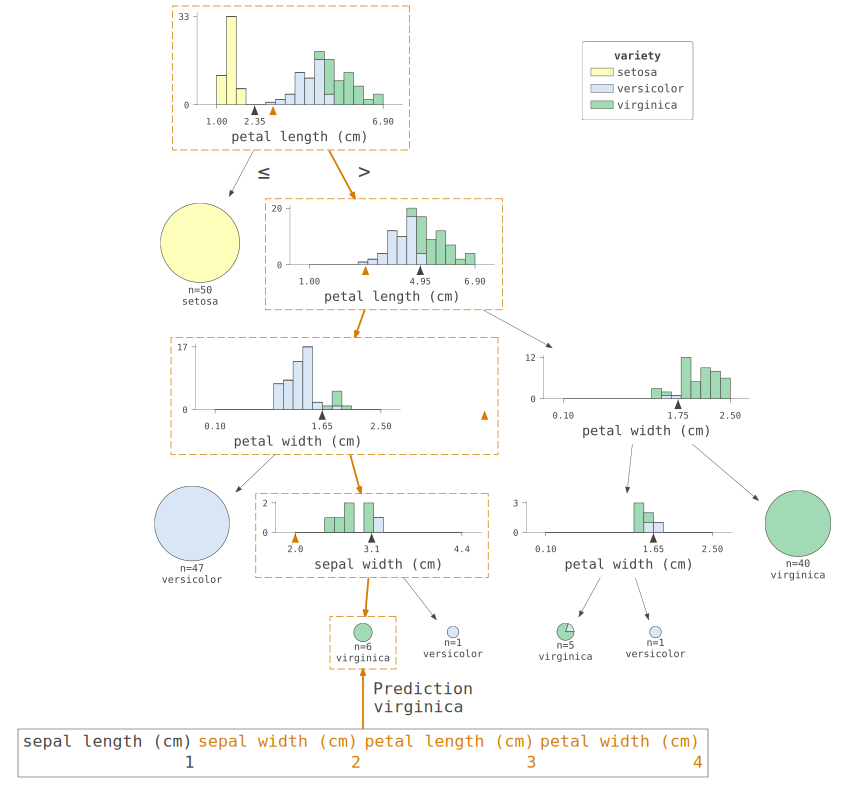

In [7]:
v = viz_model.view(scale=1.5,fontname="monospace",x=[1,2,3,4])
v

In [16]:
v.dot

'\n        digraph G {\n            splines=line;\n            nodesep=0.1;\n            ranksep=.2;\n            rankdir=TD;\n            margin=0.0;\n            \n            node [margin="0.03" penwidth="0.5" width=.1, height=.1];\n            edge [arrowsize=.4 penwidth="0.3"]\n\n            node5 [margin="0" shape=box penwidth=".5" color="#D67C03" style="dashed" label=<<table border="0">\n                    \n                    <tr>\n                            <td><img src="/tmp/node5_5194.svg"/></td>\n                    </tr>\n                    </table>>]\n\tnode3 [margin="0" shape=box penwidth=".5" color="#D67C03" style="dashed" label=<<table border="0">\n                    \n                    <tr>\n                            <td><img src="/tmp/node3_5194.svg"/></td>\n                    </tr>\n                    </table>>]\n\tnode9 [margin="0" shape=none label=<<table border="0">\n                    \n                    <tr>\n                            <td><img s

In [18]:
v.svg()

'<svg xmlns="http://www.w3.org/2000/svg" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:ns2="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink" width="843.0" height="795.0" viewBox="0.0 0.0 843.0 795.0">\n<g id="graph0" class="graph" transform="scale(1.5 1.5) rotate(0) translate(4 526)">\n<title>G</title>\n<polygon fill="white" stroke="transparent" points="-4,4 -4,-526 558,-526 558,4 -4,4" />\n<g id="clust7" class="cluster">\n<title>cluster_legend</title>\n</g>\n<g id="clust8" class="cluster">\n<title>cluster_instance</title>\n</g>\n\n<g id="node1" class="node">\n<title>node5</title>\n<polygon fill="none" stroke="#d67c03" stroke-width="0.5" stroke-dasharray="5,2" points="321.5,-197 166.5,-197 166.5,-141 321.5,-141 321.5,-197" />\n<svg width="147px" height="48px" viewBox="0 0 195.95625 64.423125" version="1.1" preserveAspectRatio="xMinYMin meet" x="171" y="-193">\n <metadata>\n  <rdf:RDF>\n   <ns2:Work>\n

In [8]:
dir(v)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_svg_',
 'dot',
 'save',
 'save_svg',
 'scale',
 'show',
 'svg',
 'view']

In [10]:
print(v.save_svg.__doc__)

Saves the current object as SVG file in the tmp directory and returns the filename


In [11]:
v.dot

'\n        digraph G {\n            splines=line;\n            nodesep=0.1;\n            ranksep=.2;\n            rankdir=TD;\n            margin=0.0;\n            \n            node [margin="0.03" penwidth="0.5" width=.1, height=.1];\n            edge [arrowsize=.4 penwidth="0.3"]\n\n            node5 [margin="0" shape=box penwidth=".5" color="#D67C03" style="dashed" label=<<table border="0">\n                    \n                    <tr>\n                            <td><img src="/tmp/node5_5194.svg"/></td>\n                    </tr>\n                    </table>>]\n\tnode3 [margin="0" shape=box penwidth=".5" color="#D67C03" style="dashed" label=<<table border="0">\n                    \n                    <tr>\n                            <td><img src="/tmp/node3_5194.svg"/></td>\n                    </tr>\n                    </table>>]\n\tnode9 [margin="0" shape=none label=<<table border="0">\n                    \n                    <tr>\n                            <td><img s